In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("Dataset.csv")
df.head()


,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


In [3]:
df.columns


Index(['Unnamed: 0', 'text', 'Emotion'], dtype='object')

In [6]:
df['Emotion'].value_counts()
df.dropna(inplace=True)


In [8]:
X = df['text']
y = df['Emotion']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [9]:
tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [11]:
y_pred = model.predict(X_test_tfidf)


In [12]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       anger       0.98      0.94      0.96      3701
     boredom       1.00      0.50      0.67        38
       empty       0.99      0.35      0.51      1663
  enthusiasm       1.00      0.97      0.98      2791
         fun       0.99      0.89      0.94      3022
   happiness       0.98      0.98      0.98      8153
        hate       0.99      0.82      0.90      4580
        love       0.99      0.98      0.99     11866
     neutral       0.98      1.00      0.99    202362
      relief       0.98      0.86      0.92      5019
     sadness       0.99      0.96      0.98      5244
    surprise       1.00      0.95      0.97      2086
       worry       0.99      0.96      0.98      1342

    accuracy                           0.98    251867
   macro avg       0.99      0.86      0.90    251867
weighted avg       0.98      0.98      0.98    251867



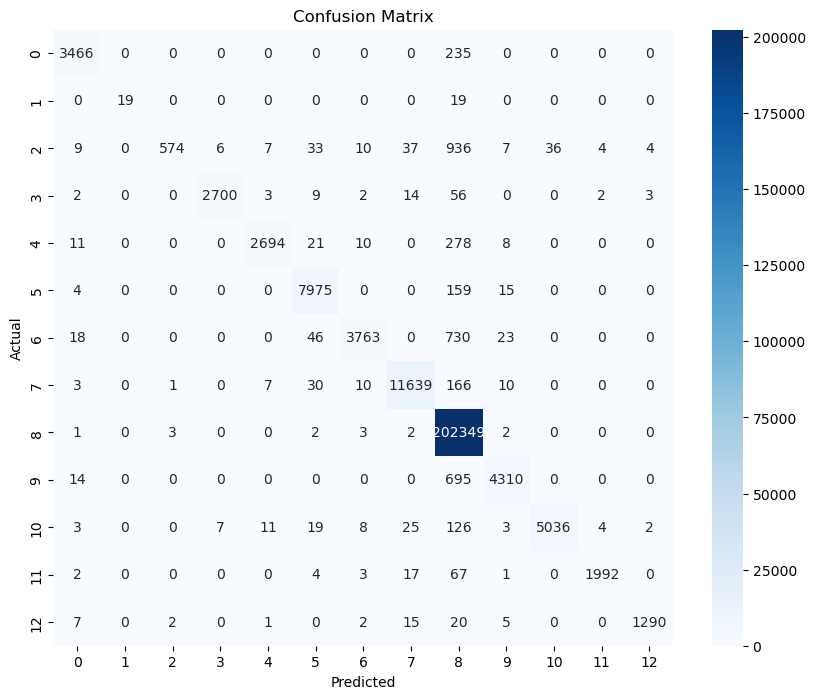

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [28]:
sample_text = ["i feel terrific and kind of sad at the same time life is good you know who you are i bet even before i write anything specific to you or about you because i know that you know that i am always thinking about you oh was that specific"]
sample_vec = tfidf.transform(sample_text)
prediction = model.predict(sample_vec)

print("Predicted Emotion:", prediction[0])


Predicted Emotion: sadness


In [30]:

import pickle


with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)


with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ FILES SAVED SUCCESSFULLY!")
print("📁 tfidf.pkl  ← Text preprocessor")
print("📁 model.pkl  ← Emotion classifier")
print("\n Ready for Streamlit! Run: streamlit run app.py")


✅ FILES SAVED SUCCESSFULLY!
📁 tfidf.pkl  ← Text preprocessor
📁 model.pkl  ← Emotion classifier

 Ready for Streamlit! Run: streamlit run app.py
